In [1]:
import faker
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import string
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import dataloader,dataset,sampler

In [3]:
"""
%%writefile test.py
import numpy as np
import guru
"""

'\n%%writefile test.py\nimport numpy as np\nimport guru\n'

In [2]:
torch.__version__

'1.0.0'

In [4]:
def get_count_for_flames(name1,name2):
    name1,name2=name1.lower().replace(' ',''),name2.lower().replace(' ','')
    count=0
    for i in list(name1+name2):
        #print(i)
        if i not in set(name1).intersection(name2):
            count+=1 
    return count

In [5]:
def flames(name1,name2):
    count=get_count_for_flames(name1,name2)

    result = ["Friends", "Love", "Affection", "Marriage", "Enemy", "Siblings"] 

    while len(result) > 1 : 

        # store that index value from 
        # where we have to perform slicing. 
        split_index = (count % len(result) - 1) 
        # this steps is done for performing 
        # anticlock-wise circular fashion counting. 
        if split_index >= 0 : 

            # list slicing 
            right = result[split_index + 1 : ] 
            left = result[ : split_index] 
            # list concatenation 
            result = right + left 

        else : 
            result = result[ : len(result) - 1] 
    return result[0]


In [6]:
def collect_data(size):
    male=[]
    female=[]
    fake=faker.Faker()
    for i in range(size):
        male.append(fake.name_male())
        female.append(fake.name_female())
    print(len(set(male)),len(set(female)))
    return male,female

In [7]:
def get_tagging(male,female):
    flames_result=[]
    for n1,n2 in zip(male,female):
        flames_result.append(flames(n1,n2))
    return flames_result

In [7]:
male,female=collect_data(100000)

KeyboardInterrupt: 

In [292]:
flames_result=get_tagging(male,female)

In [8]:
df=pd.read_csv('flames_data1.csv')
#df=pd.DataFrame(columns=['male','female','flames_result'])
#df['male']=male
#df['female']=female
#df['flames_result']=flames_result
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,male,female,flames_result
0,0,0,0,glenn lewis,brittney williams,Affection
1,1,1,1,jose harris,cynthia ferguson,Enemy
2,2,2,2,joel thomas,alexis brown,Love
3,3,3,3,john davis,gabrielle hall,Marriage
4,4,4,4,michael jacobs,jessica mora phd,Enemy
5,5,5,5,david stewart,haley herman,Friends
6,6,6,6,ronnie vargas,debbie lopez,Marriage
7,7,7,7,michael reese,deanna murray,Love
8,8,8,8,raymond sanchez,tonya cole,Affection
9,9,9,9,richard norton,maria gray,Marriage


In [9]:
df['male']=df['male'].str.lower().str.replace('mr.','').str.replace('.','')
df['female']=df['female'].str.lower().str.replace('mrs','').str.replace('.','')

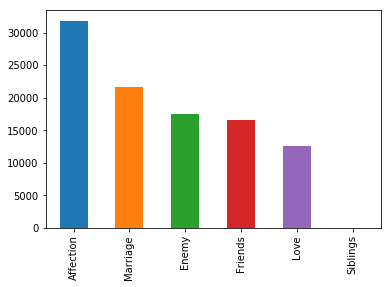

In [10]:
df['flames_result'].value_counts().plot(kind='bar')
plt.show()

In [10]:
df['flames_result'].value_counts()

Affection    31826
Marriage     21599
Enemy        17501
Friends      16516
Love         12527
Siblings        31
Name: flames_result, dtype: int64

In [11]:
df.to_csv('flames_data1.csv')

In [12]:
all_letters = string.ascii_letters
n_letters = len(all_letters)
all_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [13]:
# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(1, 1, n_letters)
    for li, letter in enumerate(line):
        tensor[0][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('a'))

print(lineToTensor('abcD'))


tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[[1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0.]]])


In [14]:
male_tensor=[]
female_tensor=[]
for m,f in zip(df.male,df.female):
    male_tensor.append(lineToTensor(m))
    female_tensor.append(lineToTensor(f))

In [15]:
m=torch.stack(male_tensor)
f=torch.stack(female_tensor)
m.size(),f.size()

(torch.Size([100000, 1, 1, 52]), torch.Size([100000, 1, 1, 52]))

In [16]:
class flamesDataset(dataset.Dataset):
    def __init__(self,x,y):
        self.X=x
        self.Y=y
    def __getitem__(self,indx):
        return self.X[indx],torch.from_numpy(np.array(self.Y[indx]).astype('int64'))
    def __len__(self):
        return self.X.shape[0]

In [17]:
pd.Series.cat.categories,
df['flames_result'].astype('category').cat.categories,df['flames_result'],df['flames_result'].astype('category').cat.codes

(Index(['Affection', 'Enemy', 'Friends', 'Love', 'Marriage', 'Siblings'], dtype='object'),
 0        Affection
 1            Enemy
 2             Love
 3         Marriage
 4            Enemy
 5          Friends
 6         Marriage
 7             Love
 8        Affection
 9         Marriage
 10       Affection
 11        Marriage
 12        Marriage
 13        Marriage
 14       Affection
 15       Affection
 16           Enemy
 17        Marriage
 18           Enemy
 19       Affection
 20         Friends
 21       Affection
 22       Affection
 23       Affection
 24        Marriage
 25       Affection
 26         Friends
 27       Affection
 28            Love
 29       Affection
            ...    
 99970     Marriage
 99971      Friends
 99972        Enemy
 99973    Affection
 99974        Enemy
 99975    Affection
 99976    Affection
 99977     Marriage
 99978      Friends
 99979    Affection
 99980        Enemy
 99981     Marriage
 99982     Marriage
 99983     Marriage
 99984   

In [18]:
X=torch.cat((m,f),dim=3).squeeze_()
Y=df['flames_result'].astype('category').cat.codes.values
X.shape,X[1].shape,Y.shape
#flamesDataset()

(torch.Size([100000, 104]), torch.Size([104]), (100000,))

In [19]:
weights=1/df['flames_result'].value_counts().values
print(weights)
balancer=sampler.WeightedRandomSampler(weights=weights,num_samples=100000)

[3.14208509e-05 4.62984397e-05 5.71395920e-05 6.05473480e-05
 7.98275724e-05 3.22580645e-02]


In [20]:
fd=flamesDataset(X,Y)
fdl=dataloader.DataLoader(fd,batch_size=100,)
fdl1=iter(fdl)
x,y=next(fdl1)
x.type(),y.type()

('torch.FloatTensor', 'torch.LongTensor')

In [21]:
def train(epochs,model,optimizer,trainloader,loss_fn,PATH):
    model.train()
    for epoch in range(epochs):

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data

            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 1000 == 0: 
                print('[%d, %d] loss: %.6f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, PATH)
    return model



In [22]:
class flamesNN(nn.Module):
    def __init__(self,inp_sz,hdn=[100,500,400,6]):
        super(flamesNN,self).__init__()
        self.layer1=nn.Linear(inp_sz,hdn[0])
        self.layer2=nn.Linear(hdn[0],hdn[1])
        self.layer3=nn.Linear(hdn[1],hdn[2])
        self.layer4=nn.Linear(hdn[2],hdn[3])
        self.activation=nn.ReLU()
        self.dropout=nn.Dropout(0.4)
    def forward(self,x):
        x=self.layer1(x)
        x=self.activation(x)
        x=self.dropout(x)
        x=self.layer2(x)
        x=self.activation(x)
        x=self.dropout(x)
        x=self.layer3(x)
        x=self.activation(x)
        x=self.dropout(x)
        x=self.layer4(x)
        x=F.sigmoid(x)
        return x

In [23]:
model=flamesNN(104)
#model(x[1])

In [24]:
loss_fn= nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
train(10,model,optimizer=optimizer,trainloader=fdl,loss_fn=loss_fn,PATH='flames.pth')

F:\anaconda\lib\site-packages\torch\nn\functional.py:1332: UserWarning:

nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.



[1, 1] loss: 0.000895
[2, 1] loss: 0.000811
[3, 1] loss: 0.000812
[4, 1] loss: 0.000798
[5, 1] loss: 0.000797
[6, 1] loss: 0.000793
[7, 1] loss: 0.000797
[8, 1] loss: 0.000784
[9, 1] loss: 0.000791
[10, 1] loss: 0.000784


flamesNN(
  (layer1): Linear(in_features=104, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=500, bias=True)
  (layer3): Linear(in_features=500, out_features=400, bias=True)
  (layer4): Linear(in_features=400, out_features=6, bias=True)
  (activation): ReLU()
  (dropout): Dropout(p=0.4)
)

In [25]:
PATH='flames.pth'
checkpoint=torch.load(PATH)

In [26]:
model.load_state_dict(checkpoint['model_state_dict'])


In [27]:
Y

array([0, 1, 3, ..., 4, 2, 0], dtype=int8)

In [28]:
model.eval()
model(X[97]),Y[97]

F:\anaconda\lib\site-packages\torch\nn\functional.py:1332: UserWarning:

nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.



(tensor([9.9979e-01, 9.9492e-01, 4.6473e-04, 7.3867e-01, 8.7423e-01, 1.8242e-04],
        grad_fn=<SigmoidBackward>), 4)

In [429]:
class_correct,class_total

([0.0, 0.0, 5941.0, 0.0, 0.0, 0.0], [9.0, 26.0, 5941.0, 12.0, 12.0, 0.0])

In [29]:

classes=df['flames_result'].astype('category').cat.categories
class_correct = list(0. for i in range(6))
class_total = list(0. for i in range(6))
with torch.no_grad():
    for data in fdl:
        model.eval()
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        #print(labels,predicted)
        c = (predicted == labels).squeeze()
        for i in range(6):
            label = labels[i]
            class_correct[label] += c[i].item()
            print(label,c[i].item())
            class_total[label] += 1


class_correct,class_total

F:\anaconda\lib\site-packages\torch\nn\functional.py:1332: UserWarning:

nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.



tensor(0) 1
tensor(1) 0
tensor(3) 0
tensor(4) 0
tensor(1) 0
tensor(2) 0
tensor(1) 0
tensor(4) 0
tensor(2) 0
tensor(3) 0
tensor(2) 0
tensor(2) 0
tensor(0) 1
tensor(1) 0
tensor(3) 0
tensor(1) 0
tensor(0) 1
tensor(1) 0
tensor(3) 0
tensor(1) 0
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(4) 0
tensor(4) 0
tensor(1) 0
tensor(1) 0
tensor(3) 0
tensor(3) 0
tensor(0) 1
tensor(2) 0
tensor(1) 0
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(4) 0
tensor(0) 1
tensor(2) 0
tensor(0) 1
tensor(0) 1
tensor(4) 0
tensor(0) 1
tensor(4) 0
tensor(4) 0
tensor(2) 0
tensor(0) 1
tensor(1) 0
tensor(4) 0
tensor(3) 0
tensor(1) 0
tensor(2) 0
tensor(1) 0
tensor(3) 0
tensor(2) 0
tensor(0) 1
tensor(0) 1
tensor(3) 0
tensor(0) 1
tensor(3) 0
tensor(4) 0
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(2) 0
tensor(0) 1
tensor(0) 1
tensor(3) 0
tensor(4) 0
tensor(1) 0
tensor(0) 1
tensor(1) 0
tensor(0) 1
tensor(4) 0
tensor(0) 1
tensor(3) 0
tensor(0) 1
tensor(0) 1
tensor(3) 0
tensor(4) 0
tensor(2) 0
tensor(4) 0
tens

tensor(0) 1
tensor(1) 0
tensor(2) 0
tensor(0) 1
tensor(2) 0
tensor(3) 0
tensor(4) 0
tensor(0) 1
tensor(1) 0
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(2) 0
tensor(1) 0
tensor(4) 0
tensor(2) 0
tensor(3) 0
tensor(4) 0
tensor(1) 1
tensor(0) 1
tensor(3) 0
tensor(0) 1
tensor(1) 0
tensor(2) 0
tensor(0) 1
tensor(1) 0
tensor(4) 0
tensor(4) 0
tensor(3) 0
tensor(1) 0
tensor(4) 0
tensor(0) 1
tensor(0) 1
tensor(4) 0
tensor(2) 0
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(4) 0
tensor(0) 1
tensor(3) 0
tensor(1) 0
tensor(1) 0
tensor(0) 1
tensor(4) 0
tensor(1) 0
tensor(0) 1
tensor(0) 1
tensor(4) 0
tensor(0) 1
tensor(0) 1
tensor(1) 1
tensor(4) 0
tensor(0) 0
tensor(4) 0
tensor(0) 1
tensor(0) 1
tensor(3) 0
tensor(4) 0
tensor(3) 0
tensor(4) 0
tensor(0) 1
tensor(1) 0
tensor(1) 0
tensor(0) 1
tensor(1) 0
tensor(3) 0
tensor(0) 1
tensor(4) 0
tensor(2) 0
tensor(0) 1
tensor(1) 0
tensor(1) 0
tensor(4) 0
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(1) 0
tensor(4) 0
tensor(0) 1
tensor(4) 0
tensor(0) 1
tensor(2) 0
tens

tensor(1) 0
tensor(4) 0
tensor(4) 0
tensor(0) 1
tensor(1) 0
tensor(4) 0
tensor(0) 1
tensor(1) 0
tensor(2) 0
tensor(0) 1
tensor(4) 0
tensor(4) 0
tensor(2) 0
tensor(3) 0
tensor(0) 1
tensor(2) 0
tensor(1) 0
tensor(3) 0
tensor(0) 1
tensor(0) 1
tensor(2) 0
tensor(0) 1
tensor(4) 0
tensor(2) 0
tensor(0) 1
tensor(1) 0
tensor(4) 0
tensor(1) 0
tensor(1) 0
tensor(4) 0
tensor(4) 0
tensor(2) 0
tensor(0) 1
tensor(0) 1
tensor(3) 0
tensor(0) 1
tensor(4) 0
tensor(1) 0
tensor(0) 1
tensor(2) 0
tensor(2) 0
tensor(0) 1
tensor(3) 0
tensor(1) 0
tensor(3) 0
tensor(4) 0
tensor(0) 1
tensor(1) 0
tensor(0) 1
tensor(2) 0
tensor(4) 0
tensor(1) 0
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(4) 0
tensor(0) 1
tensor(0) 1
tensor(4) 0
tensor(0) 1
tensor(1) 0
tensor(0) 1
tensor(4) 0
tensor(3) 0
tensor(2) 0
tensor(4) 0
tensor(1) 0
tensor(2) 0
tensor(1) 0
tensor(1) 0
tensor(4) 0
tensor(0) 1
tensor(3) 0
tensor(0) 1
tensor(1) 0
tensor(1) 0
tensor(2) 0
tensor(1) 0
tensor(0) 1
tensor(1) 0
tensor(4) 0
tensor(3) 0
tensor(0) 1
tens

tensor(0) 1
tensor(4) 0
tensor(0) 1
tensor(3) 0
tensor(4) 0
tensor(4) 0
tensor(4) 0
tensor(1) 0
tensor(0) 1
tensor(2) 0
tensor(2) 0
tensor(0) 1
tensor(4) 0
tensor(4) 0
tensor(4) 0
tensor(0) 1
tensor(4) 0
tensor(0) 1
tensor(3) 0
tensor(1) 0
tensor(4) 0
tensor(4) 0
tensor(4) 0
tensor(2) 0
tensor(4) 0
tensor(0) 1
tensor(3) 0
tensor(1) 0
tensor(4) 0
tensor(4) 0
tensor(2) 0
tensor(4) 0
tensor(0) 1
tensor(0) 1
tensor(4) 0
tensor(0) 1
tensor(0) 1
tensor(4) 0
tensor(4) 0
tensor(4) 0
tensor(0) 1
tensor(4) 0
tensor(2) 0
tensor(0) 1
tensor(4) 0
tensor(2) 0
tensor(0) 1
tensor(2) 0
tensor(0) 1
tensor(0) 1
tensor(4) 0
tensor(0) 1
tensor(0) 0
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(1) 0
tensor(3) 0
tensor(4) 0
tensor(0) 1
tensor(1) 0
tensor(2) 0
tensor(4) 0
tensor(1) 1
tensor(2) 0
tensor(3) 0
tensor(4) 0
tensor(4) 0
tensor(3) 0
tensor(1) 0
tensor(0) 1
tensor(2) 0
tensor(2) 0
tensor(2) 0
tensor(2) 0
tensor(0) 1
tensor(2) 0
tensor(3) 0
tensor(2) 0
tensor(4) 0
tensor(1) 0
tensor(0) 1
tens

tensor(0) 1
tensor(0) 1
tensor(3) 0
tensor(4) 0
tensor(1) 0
tensor(0) 1
tensor(2) 0
tensor(0) 1
tensor(0) 1
tensor(2) 0
tensor(0) 1
tensor(4) 0
tensor(4) 0
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(4) 0
tensor(3) 0
tensor(2) 0
tensor(1) 0
tensor(4) 0
tensor(4) 0
tensor(0) 1
tensor(2) 0
tensor(2) 0
tensor(4) 0
tensor(2) 0
tensor(0) 1
tensor(0) 1
tensor(1) 0
tensor(2) 0
tensor(1) 0
tensor(1) 0
tensor(0) 1
tensor(3) 0
tensor(2) 0
tensor(3) 0
tensor(4) 0
tensor(0) 1
tensor(0) 1
tensor(1) 0
tensor(0) 1
tensor(2) 0
tensor(0) 1
tensor(0) 1
tensor(2) 0
tensor(2) 0
tensor(4) 0
tensor(0) 1
tensor(3) 0
tensor(2) 0
tensor(0) 1
tensor(4) 0
tensor(0) 1
tensor(1) 0
tensor(4) 0
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(4) 0
tensor(0) 1
tensor(4) 0
tensor(1) 0
tensor(0) 1
tensor(1) 0
tensor(2) 0
tensor(1) 0
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(3) 0
tensor(0) 1
tensor(0) 1
tensor(1) 0
tensor(0) 1
tensor(1) 0
tensor(4) 0
tensor(0) 1
tensor(4) 0
tens

tensor(0) 1
tensor(3) 0
tensor(4) 0
tensor(0) 1
tensor(2) 0
tensor(0) 1
tensor(4) 0
tensor(0) 1
tensor(1) 0
tensor(0) 1
tensor(0) 1
tensor(3) 0
tensor(4) 0
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(2) 0
tensor(0) 1
tensor(0) 1
tensor(1) 0
tensor(3) 0
tensor(4) 0
tensor(0) 1
tensor(2) 0
tensor(4) 0
tensor(0) 1
tensor(0) 1
tensor(1) 0
tensor(0) 1
tensor(1) 1
tensor(3) 0
tensor(2) 0
tensor(3) 0
tensor(0) 1
tensor(1) 0
tensor(2) 0
tensor(4) 0
tensor(0) 1
tensor(0) 1
tensor(1) 0
tensor(0) 1
tensor(2) 0
tensor(0) 1
tensor(4) 0
tensor(4) 0
tensor(0) 1
tensor(1) 0
tensor(1) 0
tensor(2) 0
tensor(4) 0
tensor(4) 0
tensor(2) 0
tensor(0) 1
tensor(0) 1
tensor(2) 0
tensor(3) 0
tensor(1) 0
tensor(3) 0
tensor(3) 0
tensor(2) 0
tensor(4) 0
tensor(4) 0
tensor(2) 0
tensor(0) 1
tensor(1) 0
tensor(1) 0
tensor(0) 1
tensor(2) 0
tensor(2) 0
tensor(4) 0
tensor(3) 0
tensor(4) 0
tensor(0) 1
tensor(0) 1
tensor(4) 0
tensor(0) 1
tensor(2) 0
tensor(4) 0
tensor(0) 1
tensor(0) 0
tensor(2) 0
tensor(4) 0
tensor(0) 1
tens

tensor(1) 0
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(2) 0
tensor(0) 1
tensor(2) 0
tensor(1) 0
tensor(0) 1
tensor(2) 0
tensor(4) 0
tensor(4) 0
tensor(2) 0
tensor(0) 1
tensor(1) 0
tensor(0) 1
tensor(1) 0
tensor(1) 0
tensor(1) 0
tensor(4) 0
tensor(0) 1
tensor(4) 0
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(3) 0
tensor(1) 0
tensor(4) 0
tensor(4) 0
tensor(0) 1
tensor(0) 1
tensor(4) 0
tensor(0) 1
tensor(3) 0
tensor(3) 0
tensor(3) 0
tensor(2) 0
tensor(0) 1
tensor(4) 0
tensor(4) 0
tensor(2) 0
tensor(4) 0
tensor(1) 0
tensor(4) 0
tensor(0) 1
tensor(1) 0
tensor(2) 0
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(1) 0
tensor(4) 0
tensor(0) 1
tensor(0) 1
tensor(2) 0
tensor(4) 0
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(3) 0
tensor(3) 0
tensor(0) 1
tensor(0) 1
tensor(2) 0
tensor(2) 0
tensor(0) 1
tensor(4) 0
tensor(1) 0
tensor(1) 0
tensor(2) 0
tensor(0) 1
tensor(2) 0
tensor(4) 0
tensor(0) 1
tensor(1) 0
tensor(2) 0
tensor(0) 1
tensor(0) 1
tensor(4) 0
tensor(3) 0
tensor(2) 0
tensor(3) 0
tens

tensor(4) 0
tensor(2) 0
tensor(0) 1
tensor(0) 1
tensor(3) 0
tensor(2) 0
tensor(4) 0
tensor(0) 1
tensor(0) 1
tensor(1) 0
tensor(2) 0
tensor(4) 0
tensor(4) 0
tensor(0) 1
tensor(3) 0
tensor(0) 1
tensor(0) 1
tensor(2) 0
tensor(1) 0
tensor(4) 0
tensor(1) 1
tensor(2) 0
tensor(0) 1
tensor(0) 1
tensor(2) 0
tensor(0) 1
tensor(1) 0
tensor(0) 1
tensor(0) 1
tensor(4) 0
tensor(0) 1
tensor(2) 0
tensor(2) 0
tensor(0) 1
tensor(2) 0
tensor(0) 1
tensor(0) 1
tensor(4) 0
tensor(4) 0
tensor(1) 0
tensor(2) 0
tensor(0) 1
tensor(0) 1
tensor(4) 0
tensor(0) 1
tensor(1) 0
tensor(0) 1
tensor(0) 1
tensor(4) 0
tensor(1) 0
tensor(4) 0
tensor(1) 0
tensor(2) 0
tensor(1) 0
tensor(0) 1
tensor(2) 0
tensor(3) 0
tensor(2) 0
tensor(2) 0
tensor(4) 0
tensor(1) 0
tensor(4) 0
tensor(1) 0
tensor(3) 0
tensor(4) 0
tensor(0) 1
tensor(4) 0
tensor(1) 0
tensor(4) 0
tensor(1) 0
tensor(1) 1
tensor(4) 0
tensor(0) 1
tensor(4) 0
tensor(4) 0
tensor(0) 1
tensor(4) 0
tensor(3) 0
tensor(3) 0
tensor(2) 0
tensor(0) 1
tensor(2) 0
tensor(1) 0
tens

tensor(0) 1
tensor(3) 0
tensor(1) 0
tensor(3) 0
tensor(0) 1
tensor(4) 0
tensor(4) 0
tensor(1) 0
tensor(0) 1
tensor(1) 0
tensor(0) 1
tensor(1) 0
tensor(1) 0
tensor(2) 0
tensor(2) 0
tensor(1) 0
tensor(0) 1
tensor(4) 0
tensor(2) 0
tensor(3) 0
tensor(1) 0
tensor(1) 0
tensor(4) 0
tensor(2) 0
tensor(1) 0
tensor(1) 0
tensor(2) 0
tensor(0) 1
tensor(4) 0
tensor(2) 0
tensor(2) 0
tensor(0) 1
tensor(1) 0
tensor(3) 0
tensor(4) 0
tensor(0) 1
tensor(4) 0
tensor(3) 0
tensor(2) 0
tensor(4) 0
tensor(3) 0
tensor(0) 1
tensor(3) 0
tensor(4) 0
tensor(4) 0
tensor(1) 1
tensor(2) 0
tensor(4) 0
tensor(0) 1
tensor(2) 0
tensor(0) 1
tensor(0) 1
tensor(3) 0
tensor(2) 0
tensor(0) 1
tensor(3) 0
tensor(2) 0
tensor(1) 0
tensor(1) 0
tensor(0) 1
tensor(4) 0
tensor(2) 0
tensor(4) 0
tensor(0) 1
tensor(0) 1
tensor(0) 1
tensor(3) 0
tensor(4) 0
tensor(0) 1
tensor(4) 0
tensor(0) 0
tensor(0) 1
tensor(3) 0
tensor(1) 0
tensor(0) 1
tensor(4) 0
tensor(0) 1
tensor(1) 0
tensor(3) 0
tensor(0) 1
tensor(4) 0
tensor(4) 0
tensor(2) 0
tens

([1931.0, 70.0, 20.0, 0.0, 0.0, 0.0],
 [1977.0, 1059.0, 958.0, 730.0, 1274.0, 2.0])

In [30]:
for i in range(6):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / (class_total[i]+0.001)))


Accuracy of Affection : 97 %
Accuracy of Enemy :  6 %
Accuracy of Friends :  2 %
Accuracy of  Love :  0 %
Accuracy of Marriage :  0 %
Accuracy of Siblings :  0 %


In [12]:
import tensorflow as tf

F:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

